In [378]:
#Import python libraries
#Data can be found at https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso, Ridge, ElasticNet, RidgeCV, LassoCV, ElasticNetCV, SGDRegressor, LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV
import warnings
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.stats.mstats import normaltest
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from sklearn.pipeline import Pipeline
import re



In [379]:
#Import data into dataframe
data = pd.read_csv('HRData.csv')
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,1,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,1,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,1,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,7,1,...,3,4,1,6,3,3,2,2,2,2


In [380]:
#Get information about dataframe columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [381]:
#Check for null values
for c in data.columns:
    print(c, data[c].isnull().sum()) 

Age 0
Attrition 0
BusinessTravel 0
Department 0
DistanceFromHome 0
Education 0
EducationField 0
EmployeeCount 0
EmployeeNumber 0
EnvironmentSatisfaction 0
Gender 0
HourlyRate 0
JobInvolvement 0
JobLevel 0
JobRole 0
JobSatisfaction 0
MaritalStatus 0
MonthlyIncome 0
NumCompaniesWorked 0
Over18 0
OverTime 0
PercentSalaryHike 0
PerformanceRating 0
RelationshipSatisfaction 0
StockOptionLevel 0
TotalWorkingYears 0
TrainingTimesLastYear 0
WorkLifeBalance 0
YearsAtCompany 0
YearsInCurrentRole 0
YearsSinceLastPromotion 0
YearsWithCurrManager 0


In [382]:
#Print number of unique values for each column
print('Unique Values')
for c in data.columns:
    print(c, data[c].unique().size,data[c].dtype)

Unique Values
Age 43 int64
Attrition 2 object
BusinessTravel 3 object
Department 3 object
DistanceFromHome 29 int64
Education 5 int64
EducationField 6 object
EmployeeCount 1 int64
EmployeeNumber 1470 int64
EnvironmentSatisfaction 4 int64
Gender 2 object
HourlyRate 71 int64
JobInvolvement 4 int64
JobLevel 5 int64
JobRole 9 object
JobSatisfaction 4 int64
MaritalStatus 3 object
MonthlyIncome 1349 int64
NumCompaniesWorked 10 int64
Over18 1 object
OverTime 2 object
PercentSalaryHike 15 int64
PerformanceRating 2 int64
RelationshipSatisfaction 4 int64
StockOptionLevel 4 int64
TotalWorkingYears 40 int64
TrainingTimesLastYear 7 int64
WorkLifeBalance 4 int64
YearsAtCompany 37 int64
YearsInCurrentRole 19 int64
YearsSinceLastPromotion 16 int64
YearsWithCurrManager 18 int64


C:\Users\re487\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\re487\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<AxesSubplot:xlabel='YearsAtCompany', ylabel='Count'>

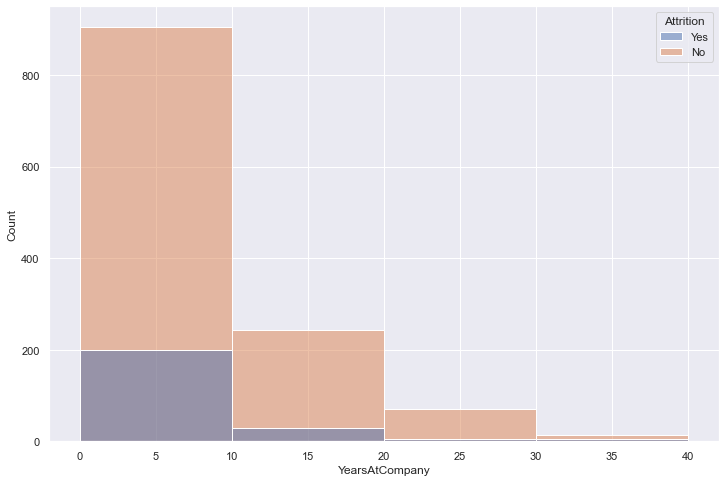

In [383]:
#Display histgram of YearsAtCompany by Attrition category

sns.set(rc={"figure.figsize":(12, 8)})
sns.histplot(data, x='YearsAtCompany', hue='Attrition', bins=4)

In [384]:
#Select rows where Attrition= 'Yes' and Drop unecessary columns
data2=data[data.Attrition=='Yes']
data2=data2.drop(columns=['Attrition','Department','Over18','EmployeeCount'])
data2.shape

(237, 28)

In [385]:
#Create dummy variables for categorical features
data3=data2.copy()

for i in data3.columns:
    if data3[i].dtype=='object':
        data3=pd.get_dummies(data3,columns=[i],drop_first=True)

data3.head()

,Age,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,2,1,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
2,37,2,2,4,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
14,28,24,3,19,3,50,2,1,3,2028,...,1,0,0,0,0,0,0,0,1,1
21,36,9,4,27,3,82,2,1,1,3407,...,0,0,0,0,0,0,1,0,1,0
24,34,6,1,31,2,83,3,1,1,2960,...,0,0,0,0,1,0,0,0,1,0


OverTime_Yes                      0.086370
PercentSalaryHike                 0.088777
JobSatisfaction                   0.095849
Gender_Male                       0.101169
MaritalStatus_Single              0.110438
JobRole_Manufacturing Director    0.126171
JobRole_Sales Executive           0.148890
Education                         0.157490
MaritalStatus_Married             0.179783
JobRole_Laboratory Technician     0.197441
JobRole_Sales Representative      0.205922
JobRole_Manager                   0.258855
JobRole_Research Director         0.332026
Age                               0.452909
JobLevel                          0.614977
MonthlyIncome                     0.634973
YearsSinceLastPromotion           0.702128
TotalWorkingYears                 0.767402
YearsWithCurrManager              0.769296
YearsInCurrentRole                0.810889
Name: YearsAtCompany, dtype: float64


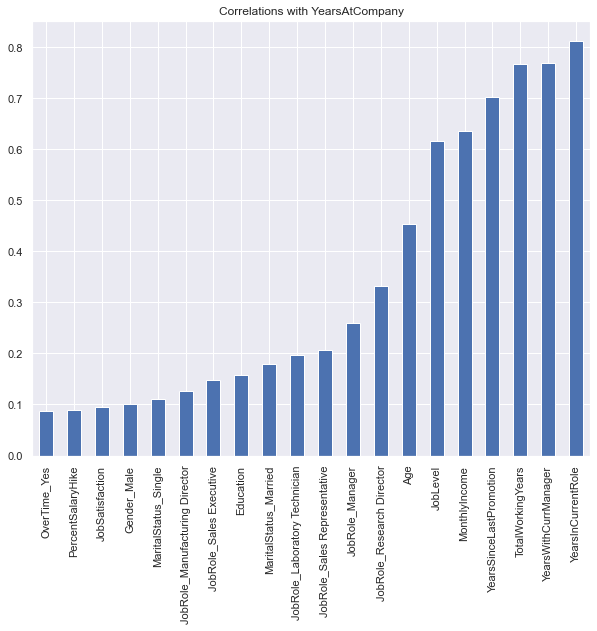

In [386]:
#Plot correlations with YearsAtCompany variable
corr_matrix = data3.corr()

for i in range(corr_matrix.shape[1]):
    corr_matrix.iloc[i,i] = 0
 
correlations=corr_matrix['YearsAtCompany']
correlations=correlations.abs().sort_values()
print(correlations[-20:])
ax = correlations[-20:].plot(kind='bar',title='Correlations with YearsAtCompany',figsize=(10,8))

C:\Users\re487\anaconda3\lib\site-packages\seaborn\rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\re487\anaconda3\lib\site-packages\setuptools\_distutils\version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\re487\anaconda3\lib\site-packages\seaborn\matrix.py:302: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  mesh = ax.pcolormesh(self.plot_data, cmap=self.cmap, **kws)
C:\Users\re487\anaconda3\lib\site-packages\seaborn\matrix.py:312: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = ax.figure.colorbar(mesh, cax

<AxesSubplot:>

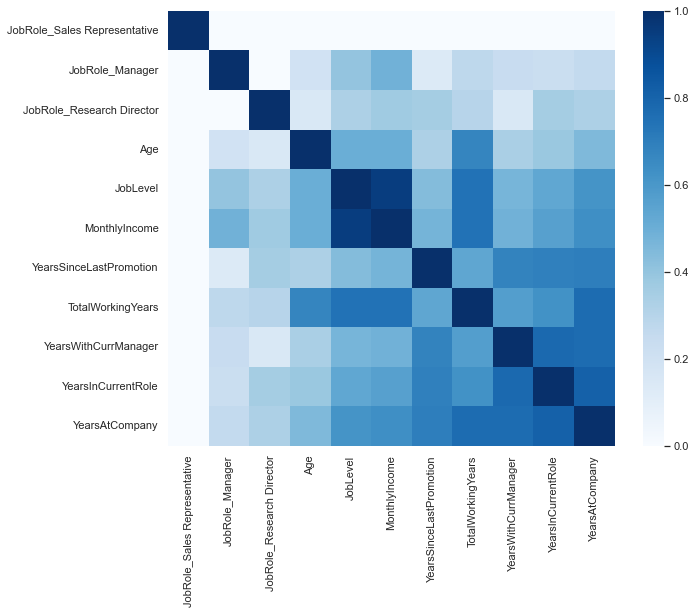

In [387]:
coor3=data3.loc[:,correlations[-10:].index]
coor3=pd.concat([coor3,data3['YearsAtCompany']],axis=1)


#Show Correlation Heatmap of 10 most correlated features
sns.set(rc = {'figure.figsize':(10,8)})
sns.heatmap(coor3.corr(),vmin=0, cmap='Blues')

In [388]:
#Split dataframe into x and y variables

x = data3.drop(columns='YearsAtCompany')
y = data3['YearsAtCompany']

In [389]:
#Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)


In [390]:
#Define Root Mean Squared Error function
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [391]:
#Scale data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

In [392]:
#Linear Regression
LR=LinearRegression()
LR = LR.fit(X_train, y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
LinearReg_rmse=rmse(y_test,y_test_pred)
LinearReg_r2=r2_score(y_test, y_test_pred)
print(X_train.shape[1],' features with degree 1')
print('rmse: ', rmse(y_test, y_test_pred))
print('r2: ',LinearReg_r2)

40  features with degree 1
rmse:  2.6018991399670517
r2:  0.7157259452143234


In [393]:
#Linear Regression with Polynomial Features degree 2
lr=LinearRegression()
pf=PolynomialFeatures(degree=2,include_bias=False)
x_poly=pf.fit_transform(X_train)
x_test_poly=pf.transform(X_test)
scaler = StandardScaler()
x_scpoly = scaler.fit_transform(x_poly)
x_test_scpoly=scaler.transform(x_test_poly)
lr=lr.fit(x_scpoly, y_train)
ypred=lr.predict(x_test_scpoly)
print(x_poly.shape[1],' polynomial features with degree 2')
print('r2: ',r2_score(y_test,ypred))
print('rmse: ', rmse(y_test, ypred))


860  polynomial features with degree 2
r2:  0.6684051659663903
rmse:  2.810125548975847


In [394]:
#Linear Regression with Polynomial Features degree 3
lr=LinearRegression()
pf=PolynomialFeatures(degree=3,include_bias=False)
x_poly=pf.fit_transform(X_train)
x_test_poly=pf.transform(X_test)
scaler = StandardScaler()
x_scpoly = scaler.fit_transform(x_poly)
x_test_scpoly=scaler.transform(x_test_poly)
lr=lr.fit(x_scpoly, y_train)
ypred=lr.predict(x_test_scpoly)
print(x_poly.shape[1],' polynomial features with degree 3')
print('r2: ',r2_score(y_test,ypred))
print('rmse: ', rmse(y_test, ypred))

12340  polynomial features with degree 3
r2:  0.756579563162221
rmse:  2.4076888647269707


In [395]:
#Create KFold object

kf = KFold(shuffle=True, random_state=0, n_splits=3)

In [396]:
#RidgeCV

alphas = [1,5,10,15,20, 25, 40, 50, 60, 65, 80, 75, 80, 90, 100]

ridgecv = RidgeCV(alphas=alphas, 
                  cv=kf).fit(X_train_sc, y_train)

ridgecv_ypred=ridgecv.predict(X_test_sc)
ridgeCV_rmse = rmse(y_test, ridgecv_ypred)
ridge_r2=r2_score(y_test, ridgecv_ypred)

print('Best Alpha:',ridgecv.alpha_,' RMSE:', ridgeCV_rmse,' R2:', ridge_r2)


Best Alpha: 50  RMSE: 2.5443904568749165  R2: 0.7281534504083642


In [397]:
#LassoCV

alphas2 = np.array([.003,.01,.03,.1,.3, 1, 3])

lassocv = LassoCV(alphas=alphas2,
                  max_iter=5000,
                  cv=kf).fit(X_train_sc, y_train)

lassocv_ypred= lassocv.predict(X_test_sc)
lassoCV_rmse = rmse(y_test, lassocv_ypred)
lasso_r2= r2_score(y_test, lassocv_ypred)

print('Best Alpha:',lassocv.alpha_,' RMSE:', lassoCV_rmse,' R2:', lasso_r2) 

Best Alpha: 0.1  RMSE: 2.3414089268753244  R2: 0.769797069097064


In [398]:
#ElasticNetCV

l1_ratios = [.05,.1,.2,.3,.4,.5,.6,.7,.8,.9]

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1e4).fit(X_train_sc, y_train)

elasticnetcv_ypred= elasticNetCV.predict(X_test_sc)
elasticNetCV_rmse = rmse(y_test, elasticnetcv_ypred)
elasticnet_r2= r2_score(y_test, elasticnetcv_ypred)

print('Best Alpha:',elasticNetCV.alpha_,' Best l1_ratio:',elasticNetCV.l1_ratio_,' RMSE:',elasticNetCV_rmse,' R2:',elasticnet_r2)

Best Alpha: 0.3  Best l1_ratio: 0.1  RMSE: 2.4827181084265626  R2: 0.74117207368326


In [399]:
#Display error and r2score metrics

errors = [LinearReg_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]
r2scores=[LinearReg_r2,ridge_r2,lasso_r2 , elasticnet_r2]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_list = pd.DataFrame(labels)
rmse_list.columns=['Model']
rmse_list['RMSE']=errors
rmse_list['R2']= r2scores
rmse_list.set_index('Model')


,RMSE,R2
Model,,
Linear,2.601899,0.715726
Ridge,2.544390,0.728153
Lasso,2.341409,0.769797
ElasticNet,2.482718,0.741172


In [400]:
#R2 scores with different lasso alpha values
scores = []

s=StandardScaler()

for alpha in alphas2:
    la = Lasso(alpha=alpha, max_iter=100000)
    
    estimator = Pipeline([
        ("scaler", s),
        ("lasso_regression", la)])

    predictions = cross_val_predict(estimator, X_train, y_train, cv = kf)
    
    score = r2_score(y_train, predictions)
    
    scores.append(score)

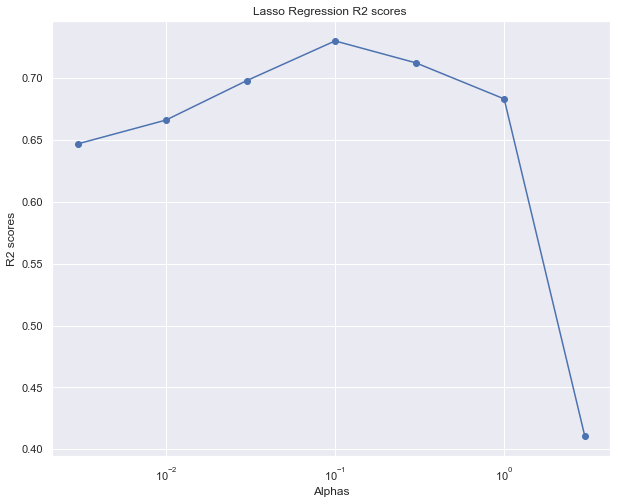

In [401]:
#Plot r2 scores with different alphas
plt.figure(figsize=(10,8))
plt.semilogx(alphas2, scores, '-o')
plt.title('Lasso Regression R2 scores ')
plt.xlabel('Alphas')
plt.ylabel('R2 scores');

In [402]:
#GridSearchCV
estimator = Pipeline([("polynomial_features", PolynomialFeatures(include_bias=False)), ("scaler", StandardScaler()),
                          ("linear_regression", LinearRegression())])

params = {
    'polynomial_features__degree': [1, 2, 3]
}

lr_grid = GridSearchCV(estimator, params, cv=kf)

In [403]:
#Fit GridSearchCV model
warnings.simplefilter("ignore")
lr_grid.fit(X_train, y_train)
lr_grid_ypred=lr_grid.predict(X_test)
lr_grid_r2=r2_score(y_test, lr_grid_ypred)
lr_grid_rmse=rmse(y_test, lr_grid_ypred)
print('Best Parameters:', lr_grid.best_params_,' RMSE:',lr_grid_rmse,' R2:', lr_grid_r2)
warnings.simplefilter("default")

Best Parameters: {'polynomial_features__degree': 3}  RMSE: 2.4076888647269707  R2: 0.756579563162221


In [404]:
#Ridge GridSearchCV
    
estimator2 = Pipeline([("polynomial_features", PolynomialFeatures(include_bias=False)), ("scaler", StandardScaler()),
                          ("ridge_regression", Ridge())])

params2 = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': alphas 
}

r_grid = GridSearchCV(estimator2, params2, cv=kf)

In [405]:
#Fit GridSearchCV model
r_grid.fit(X_train, y_train)
r_grid_ypred=r_grid.predict(X_test)
r_grid_r2=r2_score(y_test, r_grid_ypred)
r_grid_rmse=rmse(y_test, r_grid_ypred)
print('Best Parameters:', r_grid.best_params_,' RMSE:',r_grid_rmse,' R2:', r_grid_r2)

Best Parameters: {'polynomial_features__degree': 1, 'ridge_regression__alpha': 50}  RMSE: 2.5443904568749174  R2: 0.7281534504083641


In [406]:
#Lasso GridSearchCV

estimator3 = Pipeline([("polynomial_features", PolynomialFeatures(include_bias=False)), ("scaler", StandardScaler()),
                          ("lasso_regression", Lasso(max_iter=10000))])

params3 = {
    'polynomial_features__degree': [1, 2, 3],
    'lasso_regression__alpha': alphas2
   
}

l_grid = GridSearchCV(estimator3, params3, cv=kf)

In [407]:
#Fit GridSearchCV model

warnings.simplefilter("ignore")
l_grid.fit(X_train, y_train)
l_grid_ypred=l_grid.predict(X_test)
l_grid_r2= r2_score(y_test, l_grid_ypred)
l_grid_rmse=rmse(y_test, l_grid_ypred)
print('Best Parameters:', l_grid.best_params_,' RMSE:', l_grid_rmse, ' R2:',l_grid_r2)
warnings.simplefilter("default")

Best Parameters: {'lasso_regression__alpha': 0.3, 'polynomial_features__degree': 3}  RMSE: 2.1479338986376884  R2: 0.8062694402766902


In [408]:
#ElasticNet GridSearchCV

estimator4 = Pipeline([("polynomial_features", PolynomialFeatures(include_bias=False)), ("scaler", StandardScaler()),
                          ("elastic_net", ElasticNet(max_iter=5000))])

params4 = {'polynomial_features__degree': [1, 2, 3], 'elastic_net__alpha': alphas2, 'elastic_net__l1_ratio': l1_ratios}

el_grid = GridSearchCV(estimator4, params4, cv=kf)

In [409]:
#Fit GridSearchCV model
warnings.simplefilter("ignore")
el_grid.fit(X_train, y_train)
el_grid_ypred=el_grid.predict(X_test)
el_grid_rmse=rmse(y_test, el_grid_ypred)
el_grid_r2=r2_score(y_test, el_grid_ypred)
print('Best parameters:', el_grid.best_params_,' RMSE:',el_grid_rmse,' R2:', el_grid_r2)
warnings.simplefilter("default")

Best parameters: {'elastic_net__alpha': 0.3, 'elastic_net__l1_ratio': 0.7, 'polynomial_features__degree': 3}  RMSE: 2.1242544333467843  R2: 0.8105173823893359


In [410]:
#Display results of GridSeachCV models

grid_errors = [lr_grid_rmse, r_grid_rmse, l_grid_rmse, el_grid_rmse]
grid_r2scores=[lr_grid_r2, r_grid_r2, l_grid_r2 , el_grid_r2]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_list = pd.DataFrame(labels)
rmse_list.columns=['Model']
rmse_list['RMSE']=grid_errors
rmse_list['R2']= grid_r2scores
rmse_list.set_index('Model')

,RMSE,R2
Model,,
Linear,2.407689,0.756580
Ridge,2.544390,0.728153
Lasso,2.147934,0.806269
ElasticNet,2.124254,0.810517


In [411]:
#R2 scores with different ElasticNet l1_ratio values
scores2 = []

pf=PolynomialFeatures(degree=3)
s=StandardScaler()
warnings.simplefilter("ignore")
for l1ratio in l1_ratios:
    elnet = ElasticNet(alpha=.3, l1_ratio=l1ratio, max_iter=5000)
    
    estimator = Pipeline([
        ("polynomial_features",pf),
        ("scaler", s),
        ("elastic_net", elnet)])

    predictions = cross_val_predict(estimator, X_train, y_train, cv = kf)
    
    score = r2_score(y_train, predictions)
    
    scores2.append(score)
warnings.simplefilter("default")

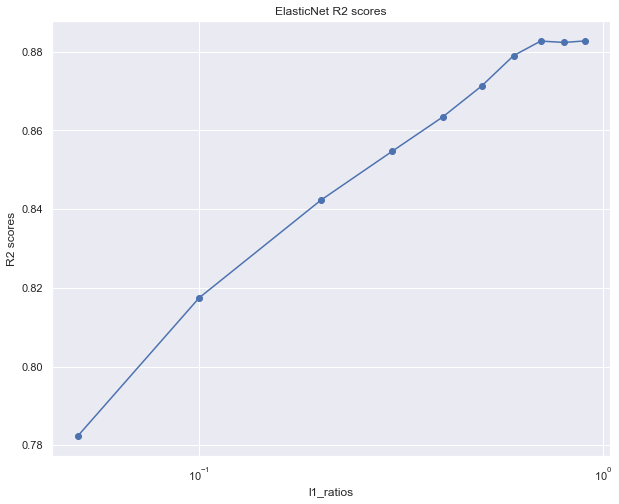

In [412]:
#Plot R2 scores with different l1_ratios
plt.figure(figsize=(10,8))
plt.semilogx(l1_ratios, scores2, '-o')
plt.title('ElasticNet R2 scores')
plt.xlabel('l1_ratios')
plt.ylabel('R2 scores');

In [413]:
#Display number of nonzero coeficients

totalcoef=np.array(el_grid.best_estimator_.named_steps['elastic_net'].coef_)
nozero=np.array(np.nonzero(el_grid.best_estimator_.named_steps['elastic_net'].coef_))
print(nozero.size,'nonzero coefficients out of ',totalcoef.size,' total coefficients')



73 nonzero coefficients out of  12340  total coefficients


In [414]:
#DataFrame of variable names and coeficient values
df_importances = pd.DataFrame( zip(el_grid.best_estimator_.named_steps["polynomial_features"].get_feature_names(),
                 el_grid.best_estimator_.named_steps["elastic_net"].coef_ ))

In [419]:
#Display positive coeficients

df_importances.columns=['variable','coeficient']
df_importances[df_importances.coeficient>0].sort_values(by='coeficient', ascending=False).head()


,variable,coeficient
9444,x15 x16 x20,0.590265
6564,x8 x15 x20,0.500890
9442,x15 x16 x18,0.471846
2680,x2 x8 x15,0.295512
9509,x15 x19^2,0.251812


In [420]:
#Display negative coeficients
df_importances[df_importances.coeficient<0].sort_values(by='coeficient').head()

,variable,coeficient
3279,x3 x5 x10,-0.133199
9110,x14 x15 x35,-0.131457
9752,x16^2 x28,-0.088194
7376,x9 x37 x39,-0.075871
7493,x10 x13 x39,-0.030901


In [421]:
#GridSearchCV results
pd.DataFrame(el_grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_elastic_net__alpha,param_elastic_net__l1_ratio,param_polynomial_features__degree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008059,0.003293,0.002654,9.864865e-04,0.003,0.05,1,"{'elastic_net__alpha': 0.003, 'elastic_net__l1...",0.739858,0.650546,0.412438,0.600947,0.138193,181
1,0.379459,0.017894,0.003308,1.886740e-03,0.003,0.05,2,"{'elastic_net__alpha': 0.003, 'elastic_net__l1...",0.838276,0.659330,0.406414,0.634673,0.177167,157
2,4.906108,0.057336,0.013826,2.688988e-03,0.003,0.05,3,"{'elastic_net__alpha': 0.003, 'elastic_net__l1...",0.845432,0.678448,0.425334,0.649738,0.172702,149
3,0.005648,0.000470,0.001662,4.695159e-04,0.003,0.1,1,"{'elastic_net__alpha': 0.003, 'elastic_net__l1...",0.739152,0.650399,0.412559,0.600703,0.137884,184
4,0.369159,0.019357,0.002628,4.883110e-04,0.003,0.1,2,"{'elastic_net__alpha': 0.003, 'elastic_net__l1...",0.880371,0.643745,0.344596,0.622904,0.219225,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.011924,0.000949,0.002987,1.081999e-05,3.0,0.8,2,"{'elastic_net__alpha': 3.0, 'elastic_net__l1_r...",0.700421,0.449721,0.686464,0.612202,0.115033,177
206,0.258415,0.063912,0.014360,1.184025e-03,3.0,0.8,3,"{'elastic_net__alpha': 3.0, 'elastic_net__l1_r...",0.753387,0.569196,0.654019,0.658867,0.075274,129
207,0.005315,0.001243,0.001994,4.052337e-07,3.0,0.9,1,"{'elastic_net__alpha': 3.0, 'elastic_net__l1_r...",0.473566,0.326952,0.656535,0.485684,0.134824,210
208,0.011701,0.003192,0.002991,9.199649e-07,3.0,0.9,2,"{'elastic_net__alpha': 3.0, 'elastic_net__l1_r...",0.672495,0.422556,0.629577,0.574876,0.109122,203
